## Student Performance Classification - Group 8
### This notebook outlines the classification of Student Performance in Exams.
#### Dataset: [https://github.com/sergioamdiaz/Proyecto-Student-Performance-Factors-/blob/master/StudentPerformanceFactors.csv]
#### This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

**Demographic**

* Gender: Gender of the student (Nominal: Male, Female).
* Family_Income: Family income level (Ordinal: Low, Medium, High).
* Parental_Education_Level: Highest education level of parents (Ordinal: High School, College, Postgraduate).

**Behavioral**
* Hours_Studied: Number of hours spent studying per week (Continuous).
* Sleep_Hours: Average number of hours of sleep per night (Continuous).
* Physical_Activity: Average number of hours of physical activity per week (Continuous).
* Extracurricular_Activities: Participation in extracurricular activities (Nominal: Yes, No).
* Internet_Access: Availability of internet access (Nominal: Yes, No).

**Parental & Peer Influence**
* Parental_Involvement: Level of parental involvement in the student's education (Ordinal: Low, Medium, High).
* Peer_Influence: Influence of peers on academic performance (Ordinal: Positive, Neutral, Negative).

**Educational Resources**
* Access_to_Resources: Availability of educational resources (Ordinal: Low, Medium, High).
* School_Type: Type of school attended (Nominal: Public, Private).
* Teacher_Quality: Quality of the teachers (Ordinal: Low, Medium, High).
* Tutoring_Sessions: Number of tutoring sessions attended per month (Continuous).

**Health Factors**
* Learning_Disabilities: Presence of learning disabilities (Nominal: Yes, No).

**Geographical**
* Distance_from_Home: Distance from home to school (Ordinal: Near, Moderate, Far).

**Historical Academic Performance**
* Attendance: Percentage of classes attended (Continuous).
* Previous_Scores: Scores from previous exams (Continuous).

**Motivation**
* Motivation_Level: Student's level of motivation (Ordinal: Low, Medium, High).

**Predict Variable (Desired Target)**
* Exam_Score: Final exam score (Continuous).

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [201]:
# Load the DataSet
data = pd.read_csv("StudentPerformanceFactors.csv")
data = pd.DataFrame(data)
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [202]:
# Mapping the Exam_Score to a new Feature column where Exam_score < mean = 'Below Average' and Exam_score >= mean = 'Above Average'
exam_mean = data["Exam_Score"].mean()
data["Student_Tier"] = data["Exam_Score"].apply(lambda x: 'Below Average' if x < exam_mean else 'Above Average')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Student_Tier
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,Below Average
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,Below Average
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,Above Average
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,Above Average
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,...,Medium,Public,Positive,2,No,High School,Near,Female,68,Above Average
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,...,High,Public,Positive,2,No,High School,Near,Female,69,Above Average
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,...,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68,Above Average
6605,10,86,High,High,Yes,6,91,High,Yes,2,...,Medium,Private,Positive,3,No,High School,Far,Female,68,Above Average


In [203]:
# Shape of the dataset:
print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")

Number of rows: 6607, Number of columns: 21


In [204]:
# Column names:
data.columns.tolist()

['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score',
 'Student_Tier']

In [205]:
data.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
Student_Tier                  object
dtype: object

In [206]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [207]:
 # Summary for categorical columns
data.describe(include=['object']) 

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Student_Tier
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male,Below Average
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814,3599


In [208]:
# Missing Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Data Cleaning

In [209]:
#Checking the unique value counts in columns
featureValues={}
for d in data.columns.tolist():
    count=data[d].nunique()
    if count==1:
        featureValues[d]=count
# List of columns having same 1 unique value        
cols_to_drop= list(featureValues.keys())
print("Columns having 1 unique value are :n",cols_to_drop)

Columns having 1 unique value are :n []


In [210]:
# Checking null percentage
data.isnull().mean()*100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
Student_Tier                  0.000000
dtype: float64

In [211]:
print(data["Teacher_Quality"].value_counts())
print(data["Parental_Education_Level"].value_counts())
print(data["Distance_from_Home"].value_counts())

Medium    3925
High      1947
Low        657
Name: Teacher_Quality, dtype: int64
High School     3223
College         1989
Postgraduate    1305
Name: Parental_Education_Level, dtype: int64
Near        3884
Moderate    1998
Far          658
Name: Distance_from_Home, dtype: int64


In [212]:
#fill missing value
data["Teacher_Quality"]= data["Teacher_Quality"].fillna("Medium")
data["Parental_Education_Level"]= data["Parental_Education_Level"].fillna("High School")
data["Distance_from_Home"]= data["Distance_from_Home"].fillna("Near")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [213]:
data.duplicated().sum()

0

In [214]:
# Numerical Features
nums_data = data.select_dtypes(include=['int64', 'float64'])

print("\nNumerical Data:")
pd.DataFrame(nums_data)


Numerical Data:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


In [215]:
# Catergorical Features
category_data = data.select_dtypes(include=['object', 'category'])
print("\nCategorical Data:")
for col in category_data :
    print(f'{col} : {data[col].unique()}')


Categorical Data:
Parental_Involvement : ['Low' 'Medium' 'High']
Access_to_Resources : ['High' 'Medium' 'Low']
Extracurricular_Activities : ['No' 'Yes']
Motivation_Level : ['Low' 'Medium' 'High']
Internet_Access : ['Yes' 'No']
Family_Income : ['Low' 'Medium' 'High']
Teacher_Quality : ['Medium' 'High' 'Low']
School_Type : ['Public' 'Private']
Peer_Influence : ['Positive' 'Negative' 'Neutral']
Learning_Disabilities : ['No' 'Yes']
Parental_Education_Level : ['High School' 'College' 'Postgraduate']
Distance_from_Home : ['Near' 'Moderate' 'Far']
Gender : ['Male' 'Female']
Student_Tier : ['Below Average' 'Above Average']


# Exploratory Data Analysis

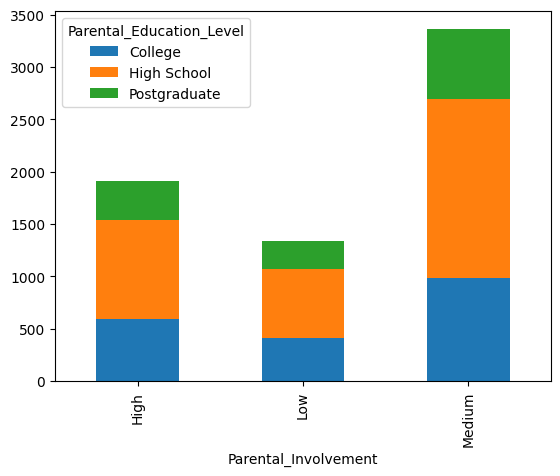

In [216]:
pd.crosstab(data["Parental_Involvement"], data["Parental_Education_Level"]).plot(kind="bar", stacked=True)
plt.show()

### Parental Involvement vs. Education Level:
1. Parental Involvement:
* "Medium" involvement is most common, followed by "High" and "Low."
* Students with parents at a college education level contribute the largest share across all involvement levels.
2. Education Level:
* Parents with "High School" education are second most represented.
* Parents with "Postgraduate" education are fewer in comparison.

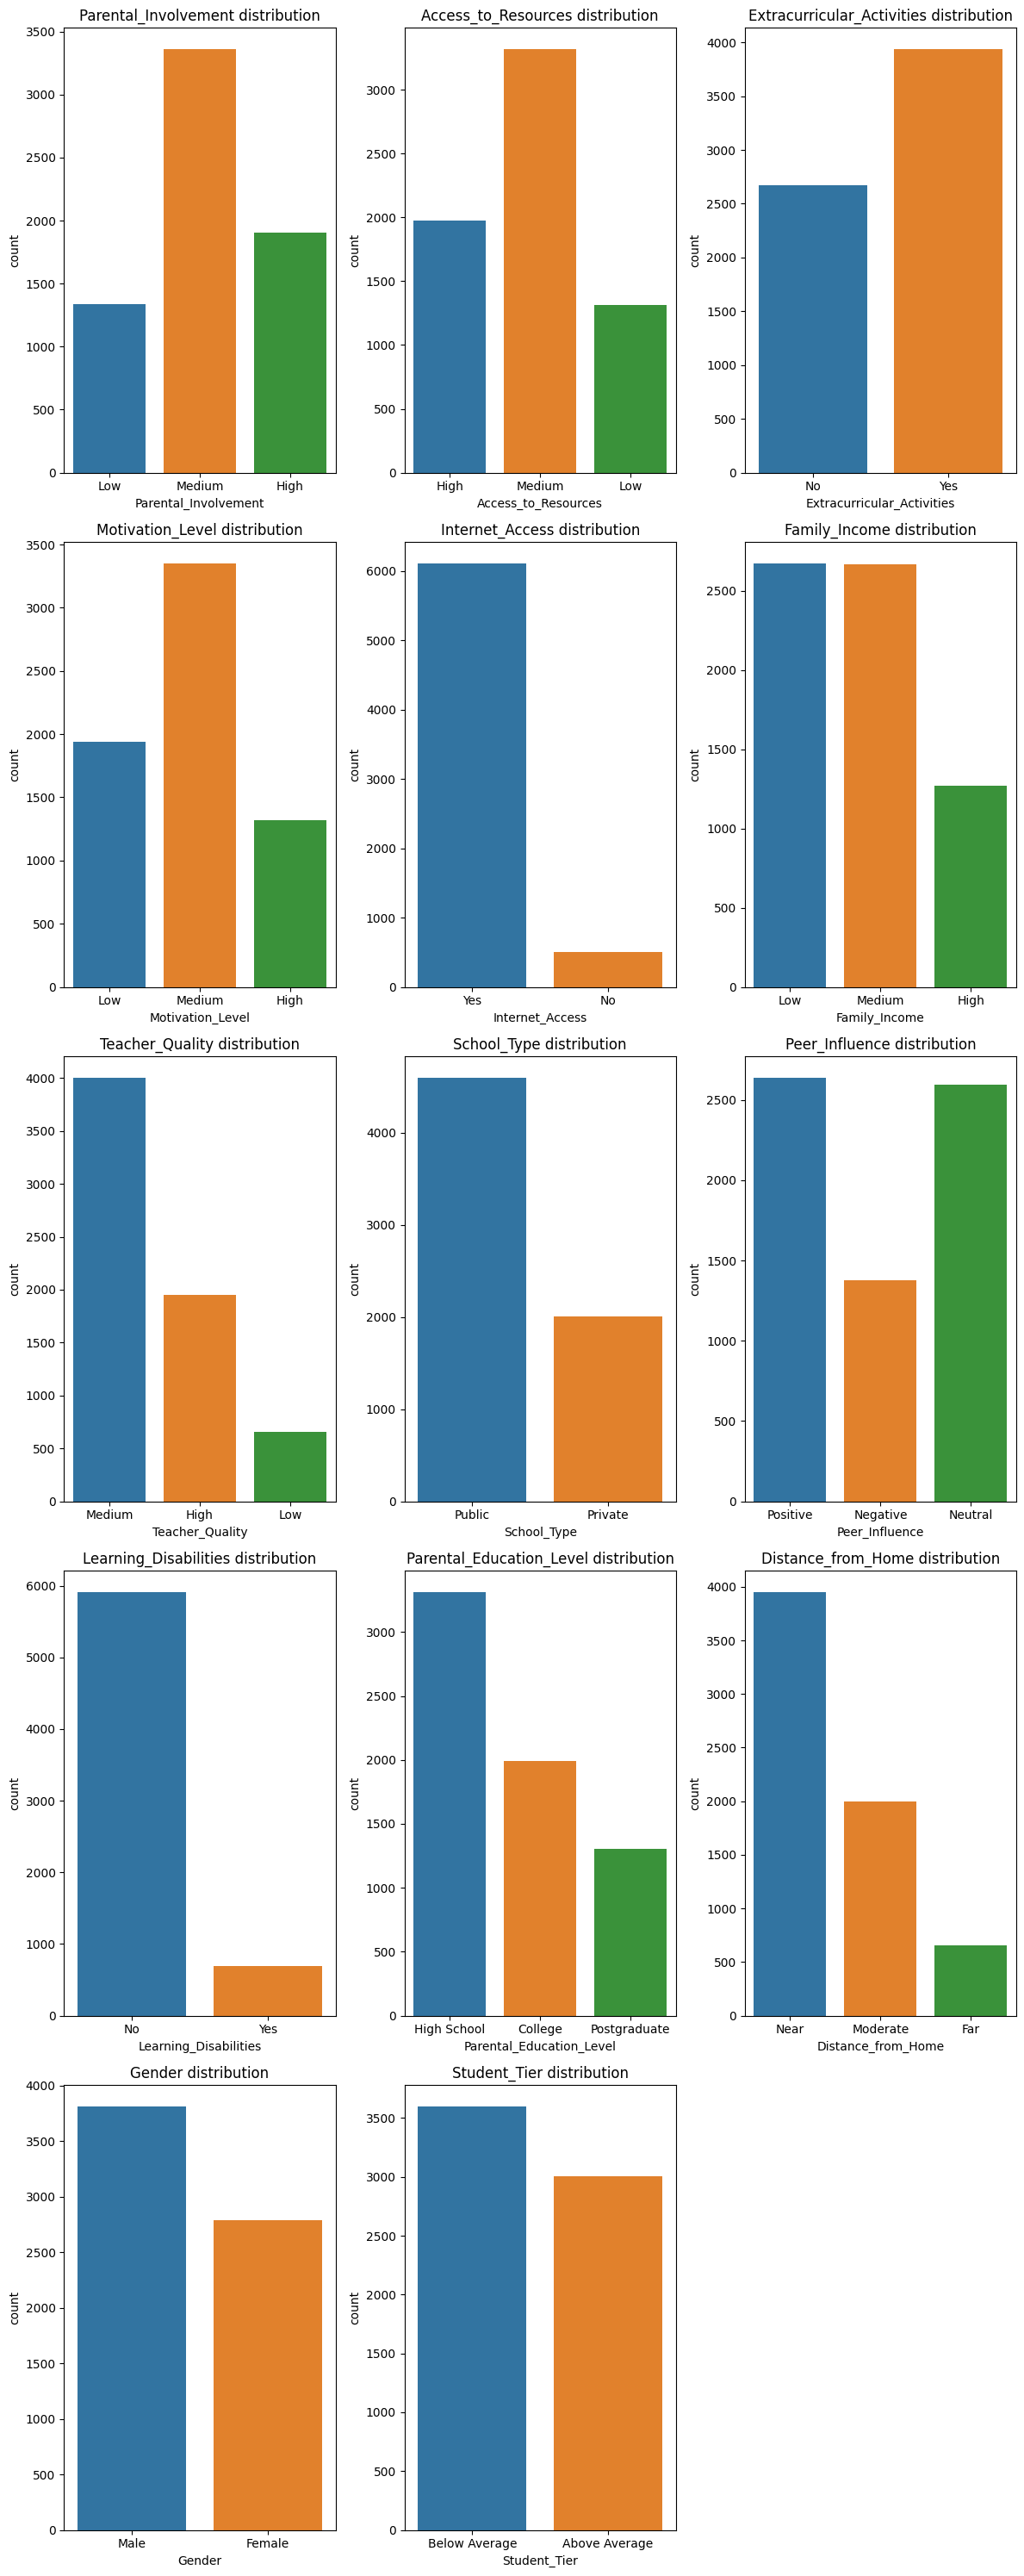

In [217]:
# Visualising Categorical Distribution

n_cols = 3  # Number of columns in the grid
n_rows = -(-len(category_data.columns) // n_cols)  # Calculate required rows (ceil division)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each categorical column
for i, col in enumerate(category_data):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f"{col} distribution")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

###  Distributions of Categorical Variables
1. Parental_Involvement:
* The distribution shows that "Medium" parental involvement is the most common, followed by "Low" and then "High". This suggests that most students have moderate levels of parental engagement in their education.
2. Access_to_Resources:
* "Medium" access to resources is the most prevalent, with "Low" and "High" being less common1. This indicates that most students have adequate, but not exceptional, access to educational resources.
3. Extracurricular_Activities:
* There's a higher frequency of "Yes" responses, indicating that more students participate in extracurricular activities than those who don't.
4. Motivation_Level:
* "Medium" motivation is the most common, followed by "Low" and then "High". This suggests that while most students have average motivation, there's room for improvement in overall student motivation levels.
5. Internet_Access:
* The vast majority of students have internet access, as indicated by the high frequency of "Yes" responses.
6. Family_Income:
* "Low" income is the most common category, followed closely by "Medium", with "High" being the least frequent. This suggests that a significant portion of the student population comes from lower-income backgrounds.
7. Teacher_Quality:
* "Medium" teacher quality is reported most frequently, with "High" and "Low" being less common. This indicates that most students perceive their teachers as adequately competent.
8. School_Type:
* "Public" schools are more common in the dataset than "Private" schools1.
9. Peer_Influence:
* "Positive" peer influence is the most common, followed by "Neutral" and then "Negative". This suggests a generally supportive peer environment.
10. Learning_Disabilities:
* The vast majority of students do not have learning disabilities, as indicated by the high frequency of "No" responses.
11. Parental_Education_Level:
* "High School" is the most common parental education level, followed by "College" and then "Postgraduate". This suggests that most students come from families where parents have at least a high school education.
12. Distance_from_Home:
* "Near" is the most common category, followed by "Moderate" and then "Far". This indicates that most students live relatively close to their schools.
13. Gender:
* There's a slightly higher proportion of male students in the dataset.

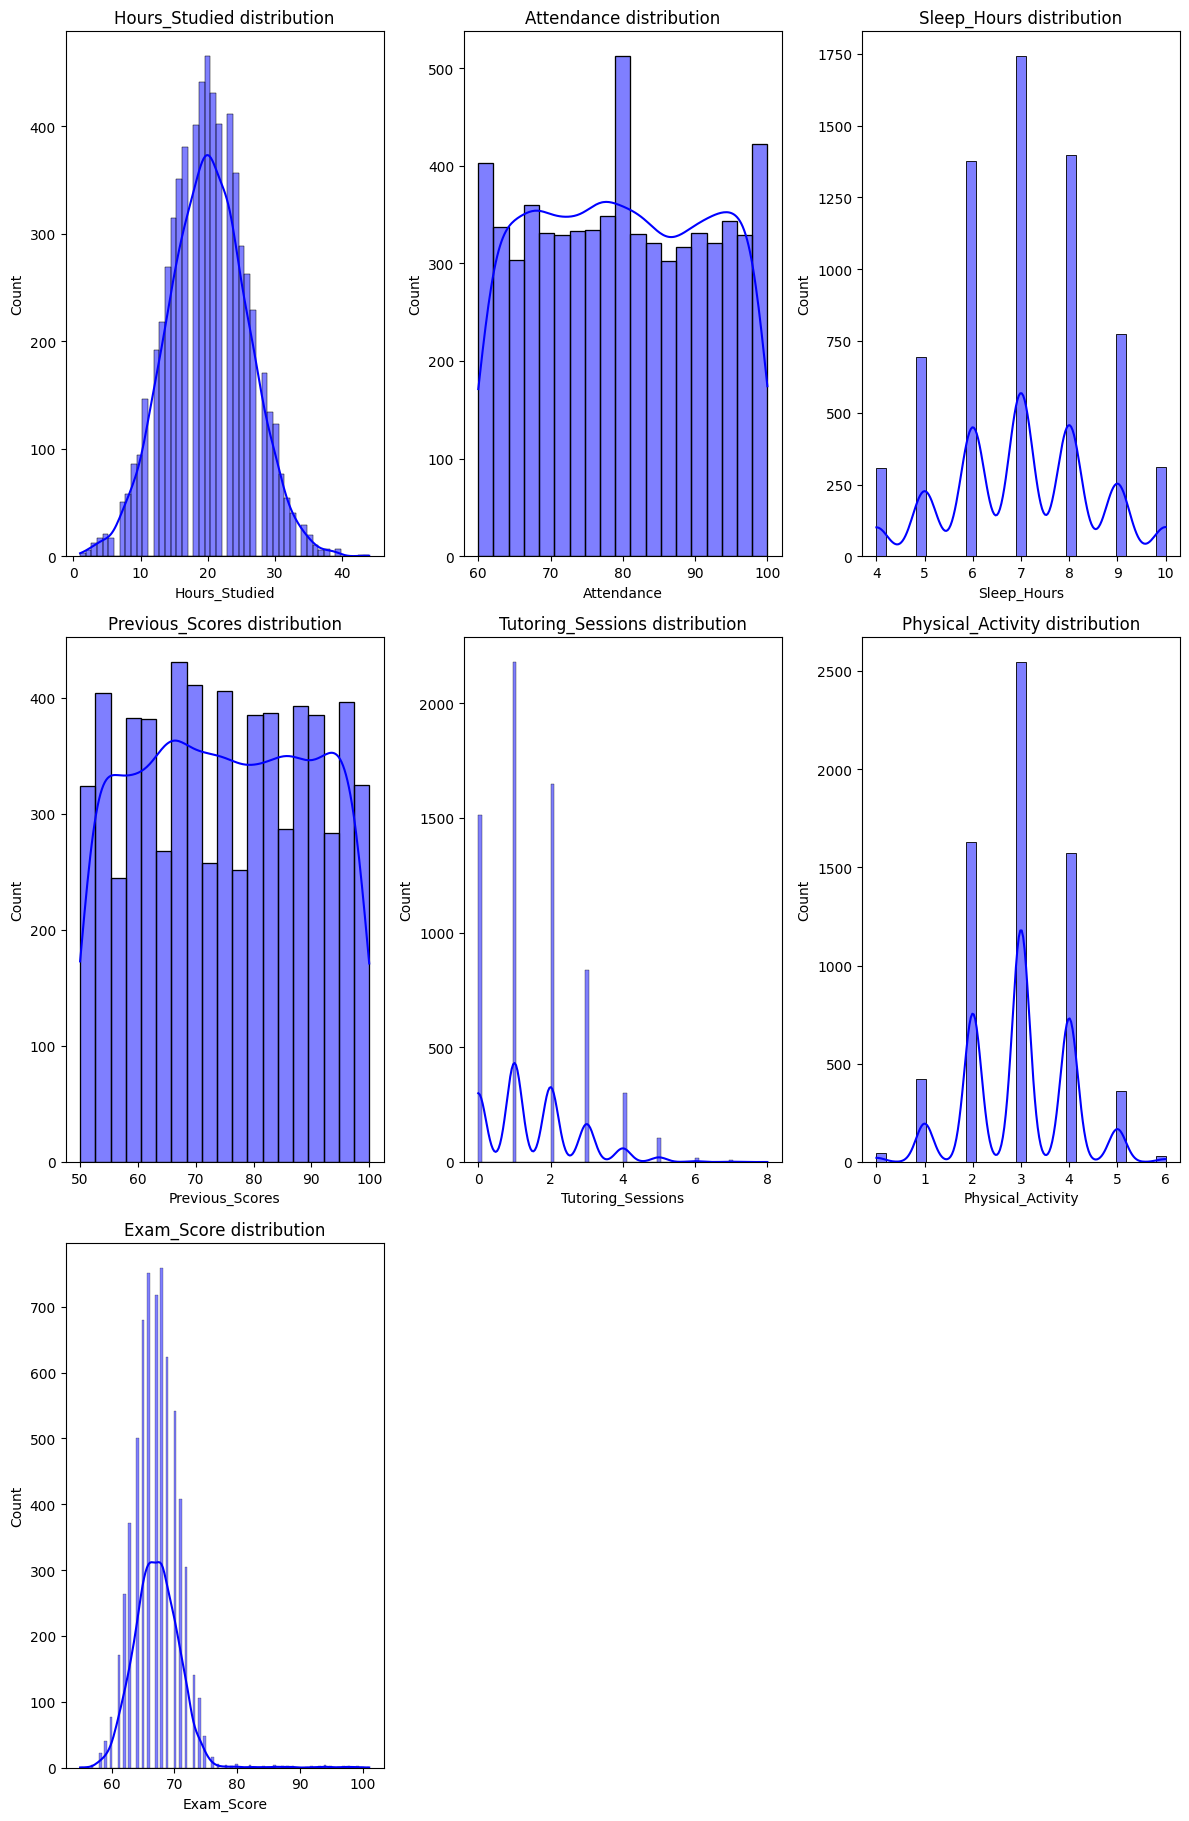

In [218]:
# Visualising Numerical Distribution

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(nums_data):
    sns.histplot(data=data, x=col, ax=axes[i], kde=True, color="b")
    axes[i].set_title(f"{col} distribution")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Distributions of Quantitative Variables:
1. Hours_Studied Distribution:
* The distribution appears to be approximately normal, centered around 20 hours.
* There is minimal skewness, suggesting a balanced range of study hours.
2. Attendance Distribution:
* The attendance shows a relatively flat distribution with small peaks around certain values.
* Most students' attendance is between 60% and 100%.
3. Sleep_Hours Distribution:
* Sleep hours exhibit multiple peaks, suggesting a multimodal distribution.
* Common sleep durations are clustered around 6, 7, and 8 hours.
4. Previous_Scores Distribution:
* The scores are uniformly distributed between 50 and 100, with no significant skewness.
5. Tutoring_Sessions Distribution:
* Tutoring sessions have a heavy concentration near 0, indicating many students attended no or very few sessions.
* A few outliers suggest higher participation in tutoring.
6. Physical_Activity Distribution:
* There are peaks around certain activity levels (e.g., 3 and 4), showing clusters of students engaging in similar physical activity patterns.
7. Exam_Score Distribution:
* The exam score distribution is normal, centered around 60–80, with a slight skew towards higher scores.


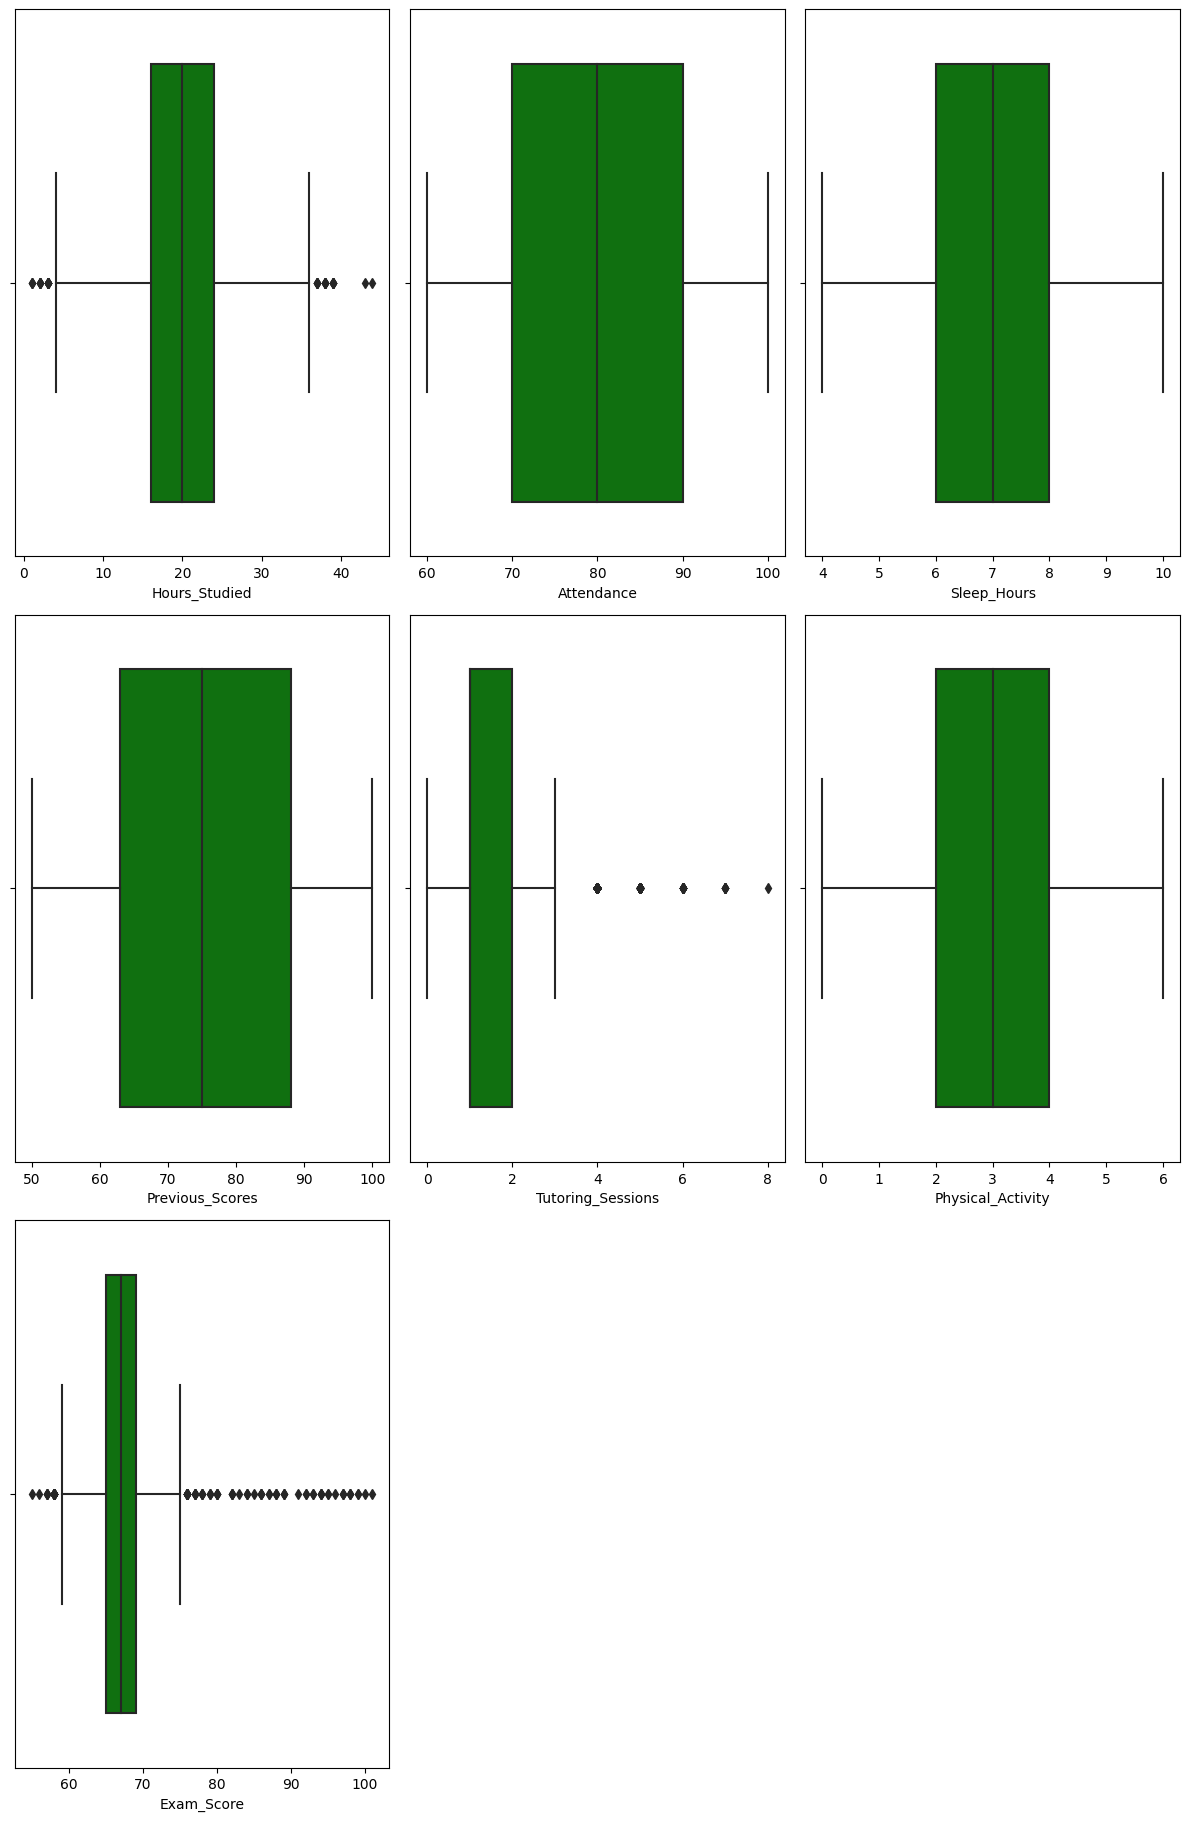

In [219]:
# Outliers in Numerical Features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(nums_data):
    sns.boxplot(x=data[col], ax=axes[i], color="green")
    
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Box Plot for Numerical Data
1.Hours_Studied:
* The box plot shows a median around 20 hours, with the interquartile range spanning from about 16 to 24 hours1. There are some outliers on the higher end, indicating a few students who study significantly more than their peers.
2. Attendance:
* The median attendance is around 80%, with the box extending from about 70% to 90%1. There are outliers on both ends, particularly on the lower end, suggesting some students with very poor attendance.
3. Sleep_Hours:
* The median sleep duration is about 7 hours, with the box ranging from roughly 6 to 8 hours1. There are outliers on both ends, indicating some students with very low or high sleep durations.
4. Previous_Scores:
* The median previous score is around 75, with the box spanning from about 63 to 881. The distribution appears relatively symmetric, with some outliers on both ends.
5. Tutoring_Sessions:
* The median number of tutoring sessions is low, likely around 1 or 2, with the box extending to about 2 or 3 sessions1. There are numerous outliers on the higher end, indicating some students who attend many more tutoring sessions than their peers.
6. Physical_Activity:
* The median physical activity is around 3 hours, with the box ranging from about 2 to 4 hours1. There are outliers on both ends, particularly on the higher end.
7. Exam_Score:
* The median exam score is around 67, with the box extending from about 65 to 691. The distribution appears relatively tight, suggesting consistency in exam performance across the student population.


c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykerne

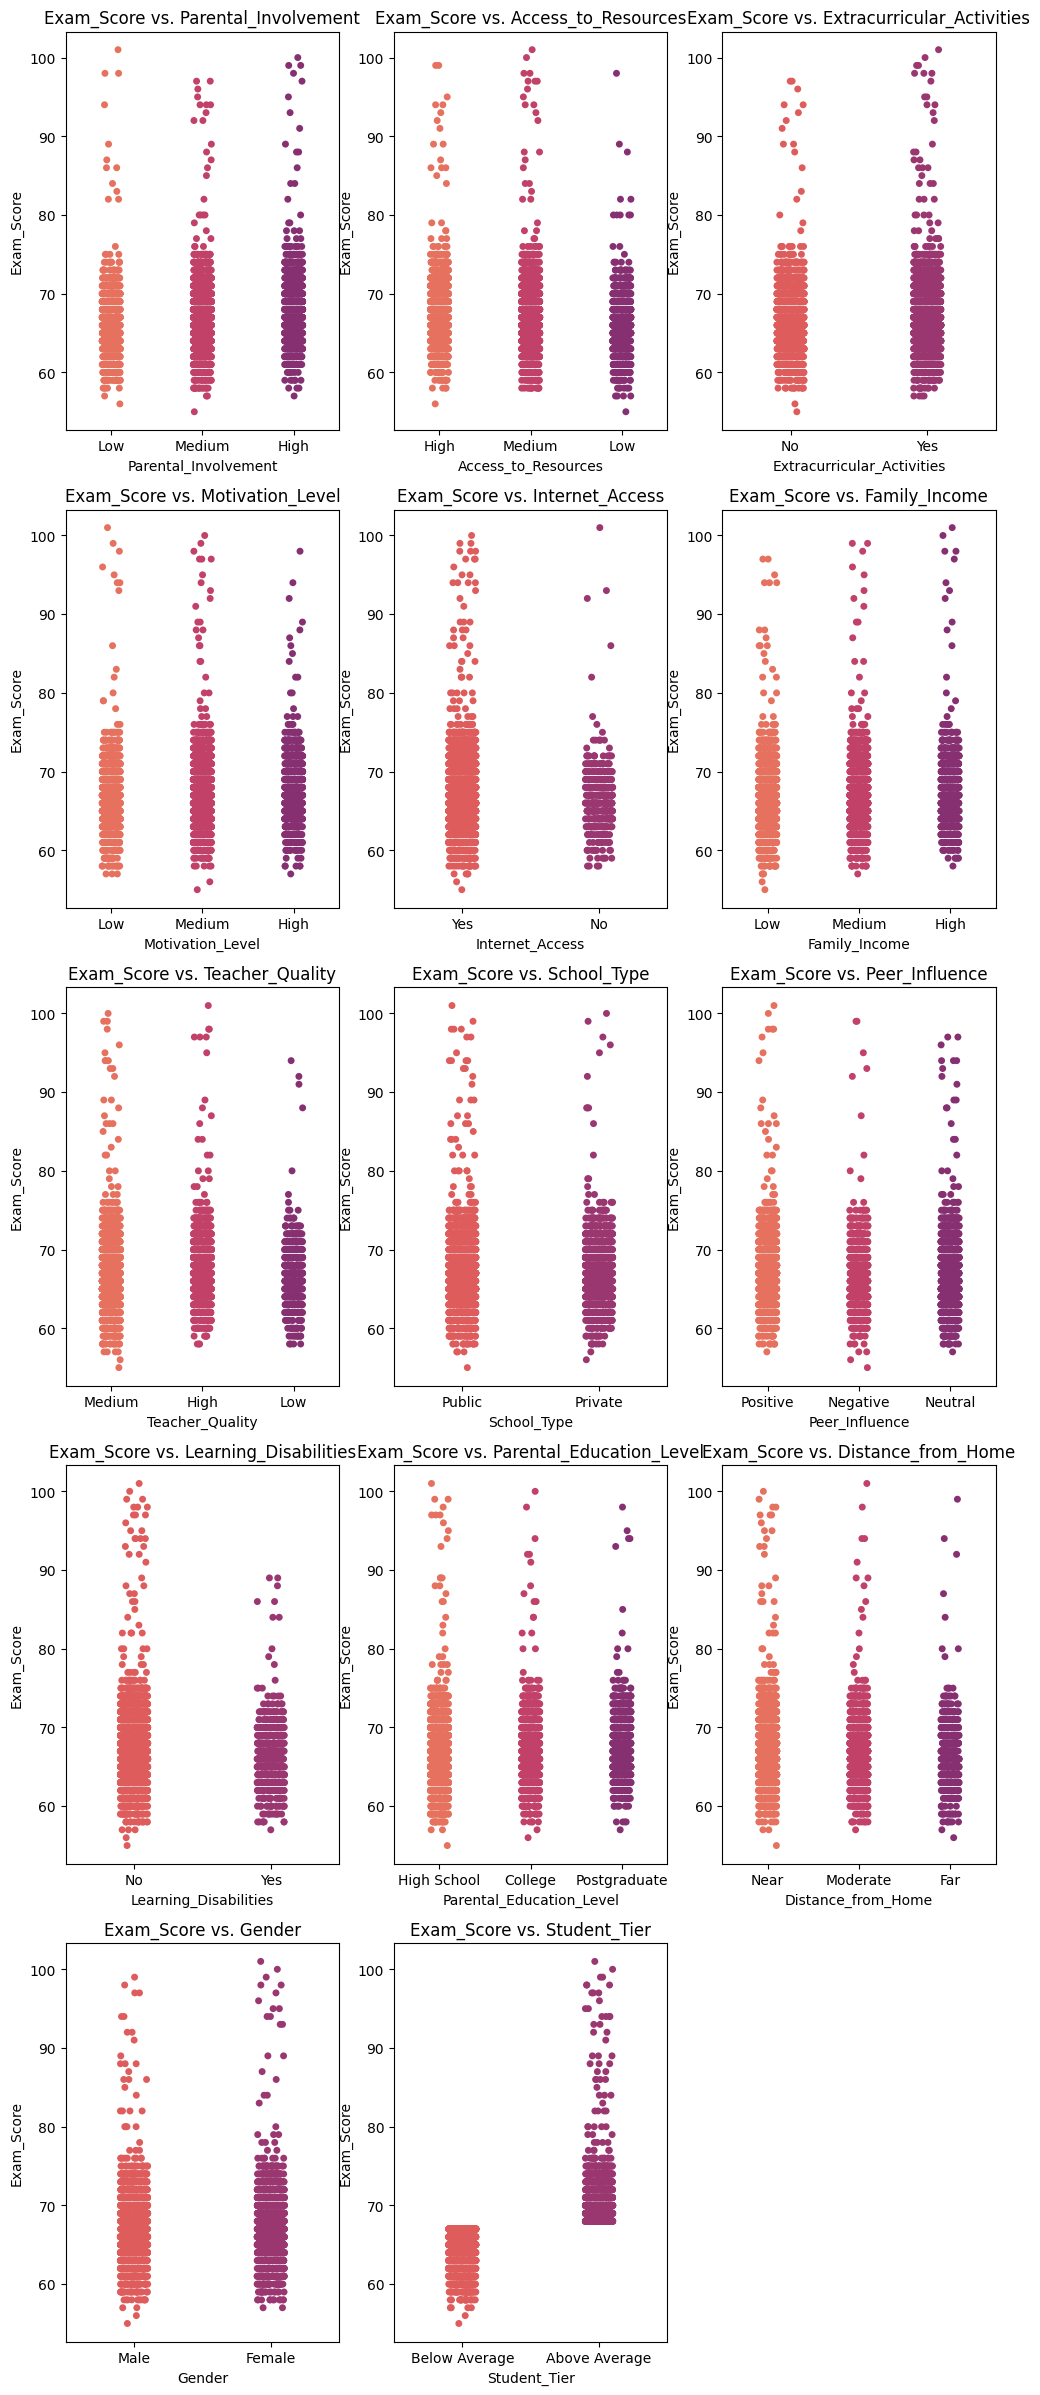

In [220]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()
target_col = "Exam_Score"

for i, col in enumerate(category_data):
    sns.stripplot(data=data, x=col, y=target_col, ax=axes[i], palette='flare')
    axes[i].set_title(f"{target_col} vs. {col}")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
    
plt.show()

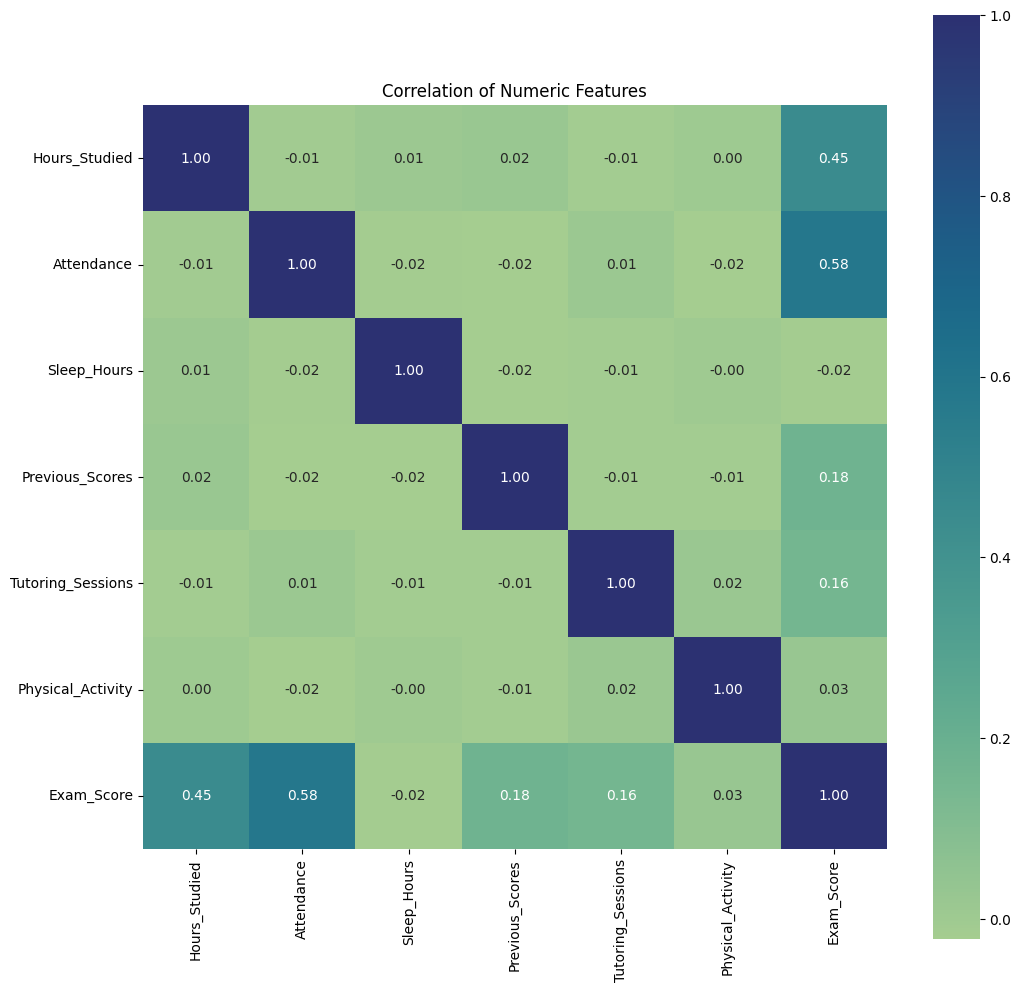

In [221]:
# Visualising correlation matrix for numerical features
plt.figure(figsize=(12, 12))
sns.heatmap(data=nums_data.corr(), cmap="crest", square=True, annot=True, cbar=True, fmt=".2f")
plt.title("Correlation of Numeric Features")

plt.show()

### Correlation between Numerical Features
* The heatmap highlights a strong positive correlation between Hours_Studied and Attendance with Exam_Score. This suggests that students who spend more time studying and have higher attendance tend to achieve better exam results.

* Previous_Scores and Tutoring_Sessions exhibit a moderate positive correlation with Exam_Score, indicating that past performance and additional support through tutoring have a noticeable but less significant impact compared to studying hours and attendance.

* Sleep_Hours and Physical_Activity show low or no significant correlation with Exam_Score, implying that while these factors contribute to overall well-being, they do not directly influence academic performance.

# Feature Engineering

In [222]:
category_data = category_data.drop("Student_Tier", axis=1)

In [223]:
# Encode categorical features using OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = encoder.fit_transform(data[category_data.columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(category_data.columns))

In [224]:
nums_data.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

In [225]:
# Encode StudentTier label
label_encoder = LabelEncoder()
data["Student_Tier"] = label_encoder.fit_transform(data["Student_Tier"])  # Below Average = 0, Above Average = 1

# Combine numeric and encoded categorical data
nums_data = data.select_dtypes(include='number').columns.tolist()
nums_data.remove("Student_Tier")  # Ensure target column isn't included in features
final_df = pd.concat([data[nums_data], encoded_categorical_df, data["Student_Tier"]], axis=1)
final_df

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male,Student_Tier
0,23,84,7,73,0,3,67,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1
1,19,64,8,59,2,4,61,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,24,98,7,91,2,4,74,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
3,29,89,8,98,1,4,71,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
4,19,92,6,65,3,4,70,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
6603,23,76,8,81,3,2,69,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
6604,20,90,6,65,3,2,68,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
6605,10,86,6,91,2,3,68,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [226]:
final_df

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male,Student_Tier
0,23,84,7,73,0,3,67,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1
1,19,64,8,59,2,4,61,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,24,98,7,91,2,4,74,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
3,29,89,8,98,1,4,71,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
4,19,92,6,65,3,4,70,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
6603,23,76,8,81,3,2,69,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
6604,20,90,6,65,3,2,68,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
6605,10,86,6,91,2,3,68,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


# Train-Test Split

In [227]:
X = final_df.drop(["Student_Tier", "Exam_Score"], axis=1)
y = final_df["Student_Tier"]

In [228]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (4624, 27)
train size y :  (4624,)
test size X :  (1983, 27)
test size y :  (1983,)


In [229]:
#check for distribution of labels
y_train.value_counts(normalize=True)

1    0.544983
0    0.455017
Name: Student_Tier, dtype: float64

In [230]:
final_df = final_df.drop(["Exam_Score"], axis=1)

# Model Implementation

In [231]:
# Function to train, evaluate, and compare models
def evaluate_models(data, target):
    # Step 1: Define X and y
    X = data.drop(columns=[target])
    y = data[target]

    # Step 2: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Step 3: Standard scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 4: Define algorithms
    algorithms = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SGD Classifier": SGDClassifier(),
        "Support Vector Machine (SVM)": SVC(probability=True),
    }

    # Step 5: Train and evaluate each model
    results = {}
    for name, model in algorithms.items():
        # Cross-validation predictions
        y_pred_cv = cross_val_predict(model, X_train, y_train, cv=4, method="predict")
        y_pred_proba_cv = (
            cross_val_predict(model, X_train, y_train, cv=4, method="predict_proba")[:, 1]
            if hasattr(model, "predict_proba")
            else None
        )

        # Fit the model and predict on test data
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Evaluate metrics
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_train, y_pred_train)
        class_report = classification_report(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

        # Save results
        results[name] = {
            "Confusion Matrix": conf_matrix,
            "Classification Report": class_report,
            "ROC-AUC": roc_auc,
            "Test Predictions": y_pred,
        }

        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
        disp.plot()
        plt.title(f"{name} - Confusion Matrix")
        plt.show()

        if y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc_score_value = auc(fpr, tpr)
            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score_value:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {name}')
            plt.legend(loc="lower right")
            plt.show()

        # Plot Feature Importance for tree-based models (Random Forest and Decision Tree)
        if name in ["Decision Tree", "Random Forest"]:
            feature_importances = model.feature_importances_
            feature_names = X.columns
            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': feature_importances
            }).sort_values(by='Importance', ascending=False)

            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=importance_df)
            plt.title(f'Feature Importance - {name}')
            plt.show()

        print(f"Model: {name}")
        print(class_report)
        print(f"ROC-AUC: {roc_auc}")
        print("-" * 50)




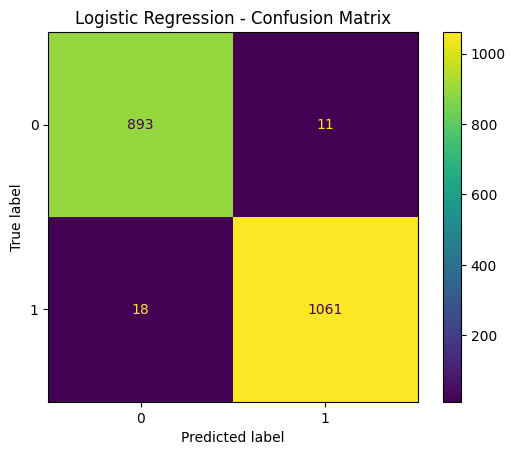

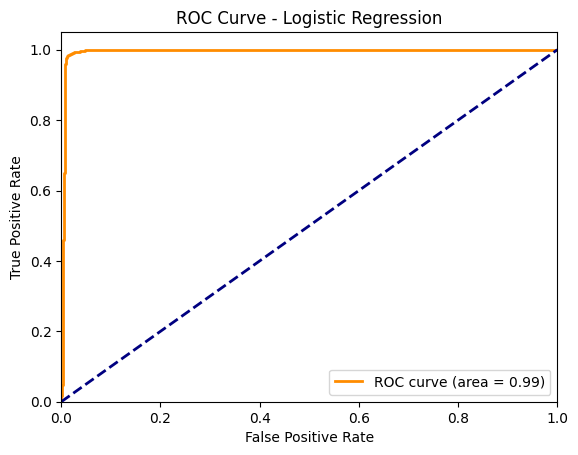

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       904
           1       0.99      0.98      0.99      1079

    accuracy                           0.99      1983
   macro avg       0.98      0.99      0.99      1983
weighted avg       0.99      0.99      0.99      1983

ROC-AUC: 0.9942691118456125
--------------------------------------------------


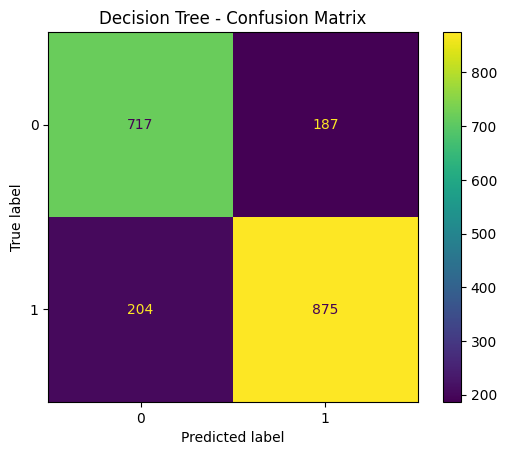

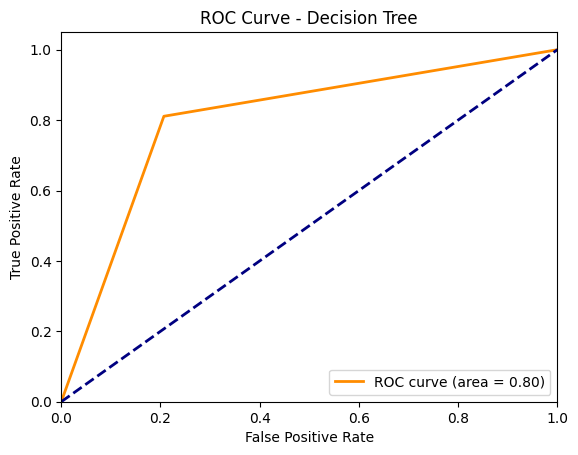

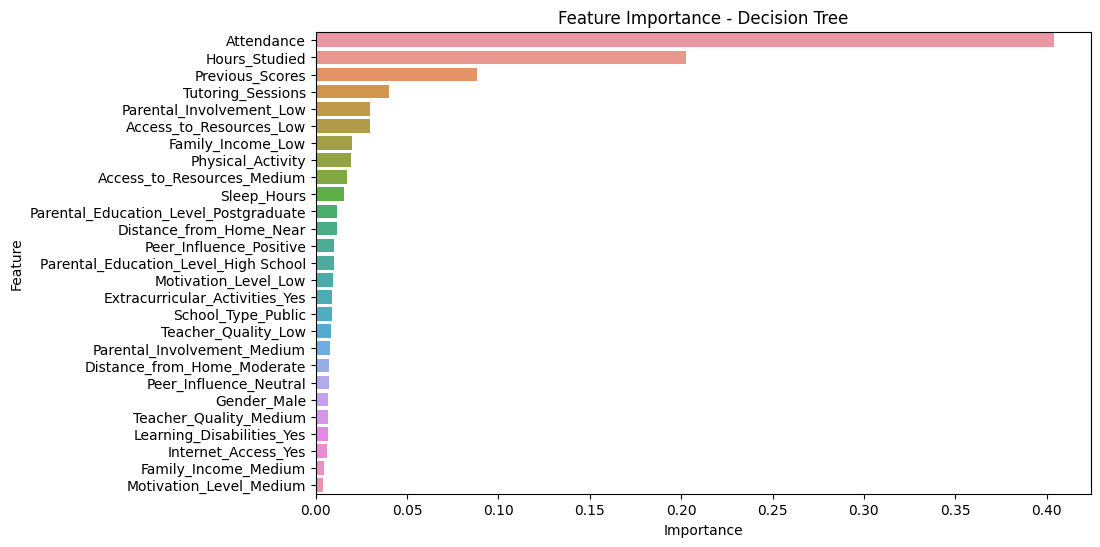

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       904
           1       0.82      0.81      0.82      1079

    accuracy                           0.80      1983
   macro avg       0.80      0.80      0.80      1983
weighted avg       0.80      0.80      0.80      1983

ROC-AUC: 0.8020388224101307
--------------------------------------------------


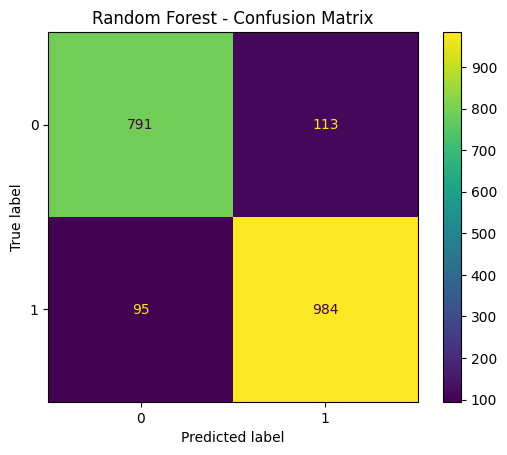

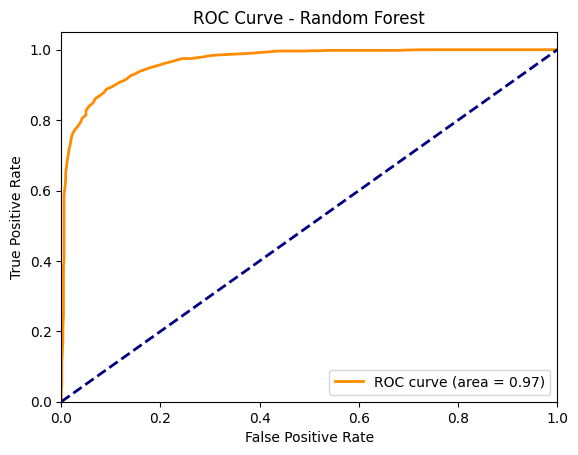

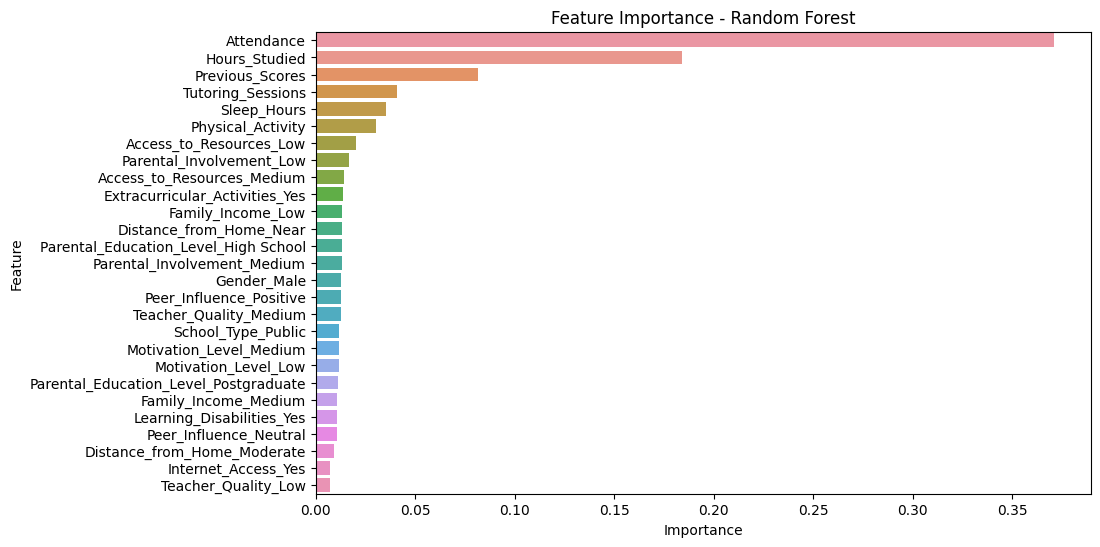

Model: Random Forest
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       904
           1       0.90      0.91      0.90      1079

    accuracy                           0.90      1983
   macro avg       0.89      0.89      0.89      1983
weighted avg       0.90      0.90      0.90      1983

ROC-AUC: 0.9658837870201022
--------------------------------------------------


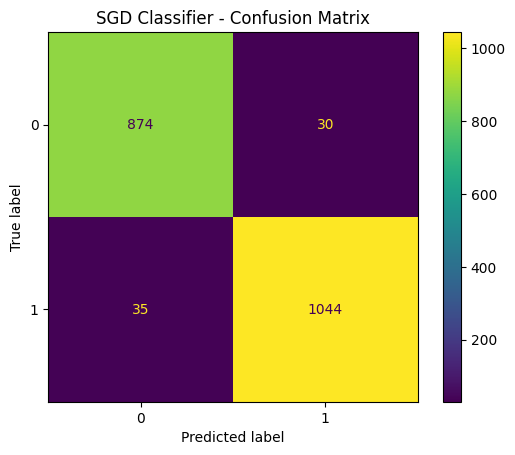

Model: SGD Classifier
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       904
           1       0.97      0.97      0.97      1079

    accuracy                           0.97      1983
   macro avg       0.97      0.97      0.97      1983
weighted avg       0.97      0.97      0.97      1983

ROC-AUC: N/A
--------------------------------------------------


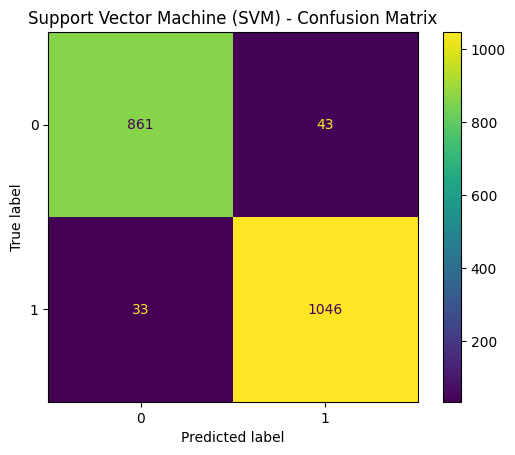

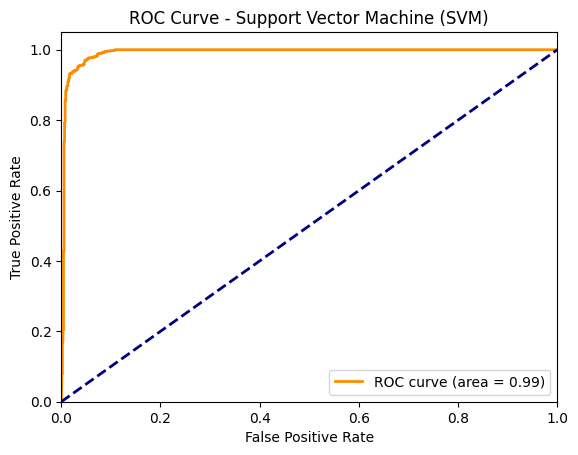

Model: Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       904
           1       0.96      0.97      0.96      1079

    accuracy                           0.96      1983
   macro avg       0.96      0.96      0.96      1983
weighted avg       0.96      0.96      0.96      1983

ROC-AUC: 0.9915569357074315
--------------------------------------------------


In [232]:
evaluate_models(final_df, "Student_Tier")

# Tuning Hyperparameters

In [233]:
def hyperparameter_tuning_and_visualization(X_train, y_train, algorithms):
    """
    Perform hyperparameter tuning using GridSearchCV and visualize results.
    """
    # Hyperparameter grids
    param_grids = {
        "Logistic Regression": {
            "C": [0.01, 0.1, 1, 10, 100],
            "solver": ["lbfgs", "liblinear"],
            "max_iter": [500, 1000],
        },
        "Decision Tree": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
            "criterion": ["gini", "entropy"],
        },
        "Random Forest": {
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
        },
        "SVM": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf", "poly"],
        },
        "SGD Classifier": {
            "loss": ["hinge", "log_loss"],
            "alpha": [0.0001, 0.001, 0.01],
            "max_iter": [500, 1000],
        },
    }

    best_models = {}

    # Perform GridSearchCV for each algorithm
    for name, model in algorithms.items():
        print(f"Hyperparameter tuning for {name}...")
        param_grid = param_grids.get(name, {})
        grid_search = GridSearchCV(
            model, param_grid, cv=4, scoring="accuracy", verbose=0, n_jobs=1
        )
        grid_search.fit(X_train, y_train)
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        best_models[name] = grid_search.best_estimator_
        
    # Evaluate the best models
    for name, model in best_models.items():
        y_pred = model.predict(X_train)
        print(f"Results for {name}:")
        print(classification_report(y_train, y_pred))
        print(confusion_matrix(y_train, y_pred))
        print("\n")

# Define algorithms
algorithms = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "SGD Classifier": SGDClassifier(),
}

# Call the function with your training data
hyperparameter_tuning_and_visualization(X_train, y_train, algorithms)


Hyperparameter tuning for Logistic Regression...


c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

Best parameters for Logistic Regression: {'C': 1, 'max_iter': 500, 'solver': 'lbfgs'}
Hyperparameter tuning for Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Hyperparameter tuning for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Hyperparameter tuning for SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Hyperparameter tuning for SGD Classifier...


c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 892, in fit
    sample_weight=sample_weight,
  File "c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 649, in

Best parameters for SGD Classifier: {'alpha': 0.01, 'loss': 'hinge', 'max_iter': 1000}
Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2104
           1       0.98      0.98      0.98      2520

    accuracy                           0.98      4624
   macro avg       0.98      0.98      0.98      4624
weighted avg       0.98      0.98      0.98      4624

[[2063   41]
 [  50 2470]]


Results for Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2104
           1       0.86      0.86      0.86      2520

    accuracy                           0.85      4624
   macro avg       0.84      0.84      0.84      4624
weighted avg       0.85      0.85      0.85      4624

[[1743  361]
 [ 353 2167]]


Results for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2104
     

# Feature Removal

Top features using pearson: ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions', 'Access_to_Resources_Low', 'Parental_Involvement_Low', 'Parental_Education_Level_Postgraduate', 'Learning_Disabilities_Yes', 'Family_Income_Low', 'Parental_Education_Level_High School', 'Distance_from_Home_Near', 'Peer_Influence_Positive', 'Motivation_Level_Low', 'Internet_Access_Yes', 'Teacher_Quality_Low']
Results using pearson selected features:


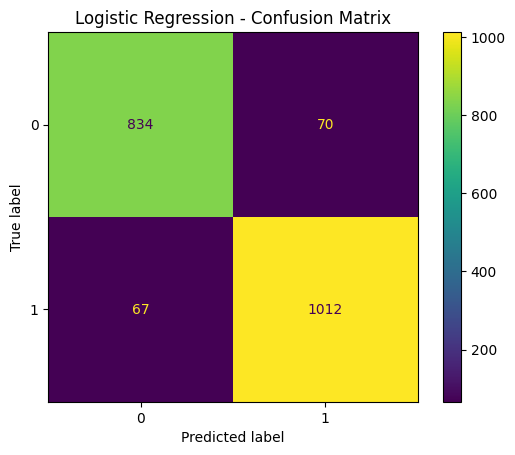

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       904
           1       0.94      0.94      0.94      1079

    accuracy                           0.93      1983
   macro avg       0.93      0.93      0.93      1983
weighted avg       0.93      0.93      0.93      1983

ROC-AUC: 0.9805580388265109
--------------------------------------------------


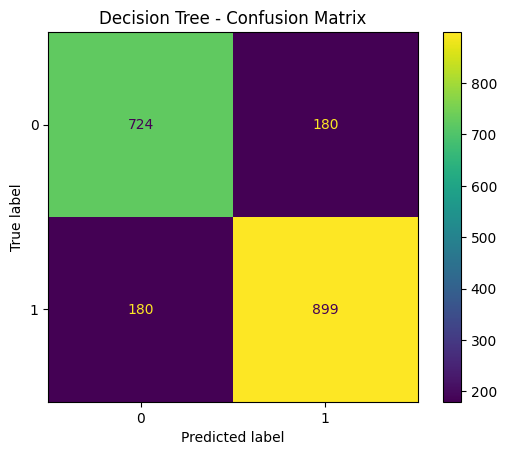

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       904
           1       0.83      0.83      0.83      1079

    accuracy                           0.82      1983
   macro avg       0.82      0.82      0.82      1983
weighted avg       0.82      0.82      0.82      1983

ROC-AUC: 0.81703191253783
--------------------------------------------------


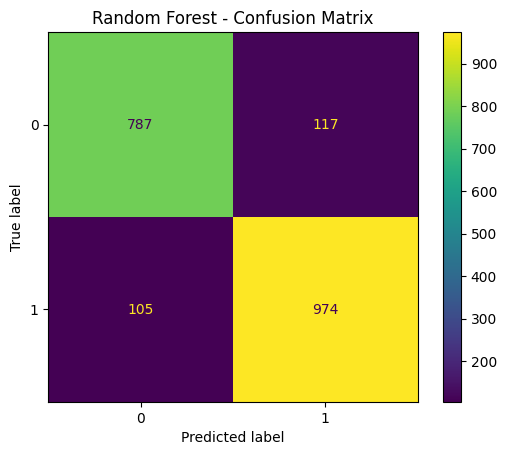

Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       904
           1       0.89      0.90      0.90      1079

    accuracy                           0.89      1983
   macro avg       0.89      0.89      0.89      1983
weighted avg       0.89      0.89      0.89      1983

ROC-AUC: 0.9613011269038031
--------------------------------------------------


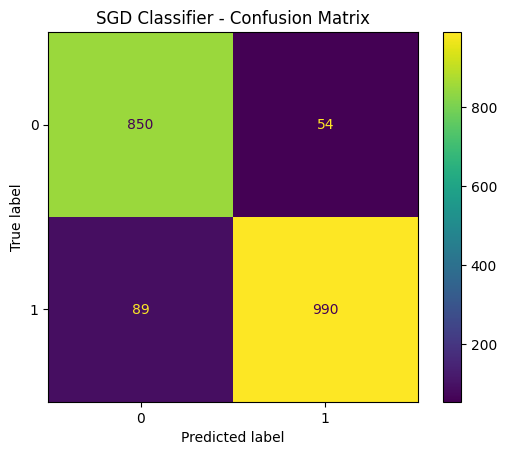

Model: SGD Classifier
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       904
           1       0.95      0.92      0.93      1079

    accuracy                           0.93      1983
   macro avg       0.93      0.93      0.93      1983
weighted avg       0.93      0.93      0.93      1983

ROC-AUC: N/A
--------------------------------------------------


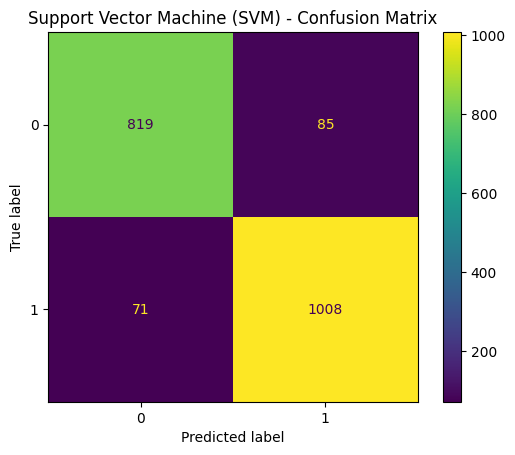

Model: Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       904
           1       0.92      0.93      0.93      1079

    accuracy                           0.92      1983
   macro avg       0.92      0.92      0.92      1983
weighted avg       0.92      0.92      0.92      1983

ROC-AUC: 0.9752433833359305
--------------------------------------------------
Top features using chi2: ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Parental_Involvement_Low', 'Access_to_Resources_Low', 'Motivation_Level_Low', 'Family_Income_Low', 'Teacher_Quality_Low', 'Peer_Influence_Positive', 'Learning_Disabilities_Yes', 'Parental_Education_Level_High School', 'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Moderate', 'Distance_from_Home_Near']
Results using chi2 selected features:


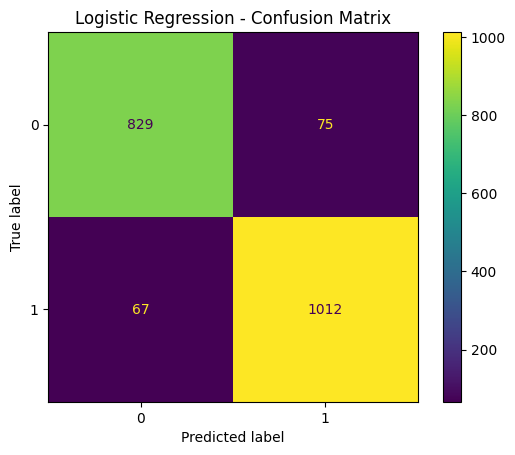

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       904
           1       0.93      0.94      0.93      1079

    accuracy                           0.93      1983
   macro avg       0.93      0.93      0.93      1983
weighted avg       0.93      0.93      0.93      1983

ROC-AUC: 0.9799449670704602
--------------------------------------------------


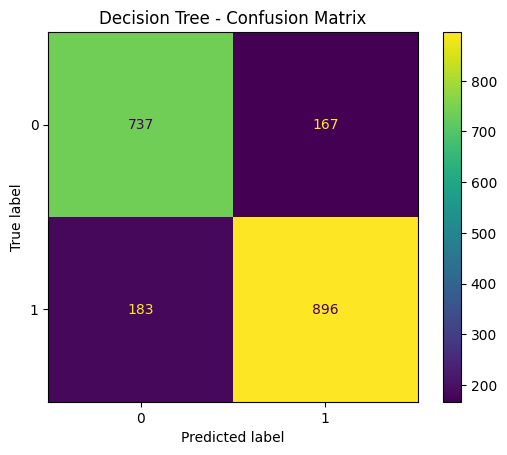

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       904
           1       0.84      0.83      0.84      1079

    accuracy                           0.82      1983
   macro avg       0.82      0.82      0.82      1983
weighted avg       0.82      0.82      0.82      1983

ROC-AUC: 0.8228320019355844
--------------------------------------------------


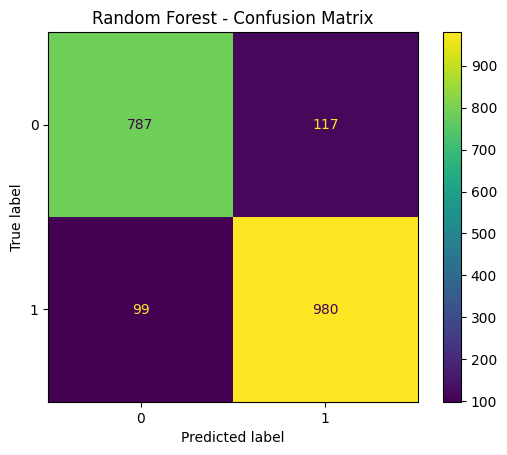

Model: Random Forest
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       904
           1       0.89      0.91      0.90      1079

    accuracy                           0.89      1983
   macro avg       0.89      0.89      0.89      1983
weighted avg       0.89      0.89      0.89      1983

ROC-AUC: 0.9621448694710769
--------------------------------------------------


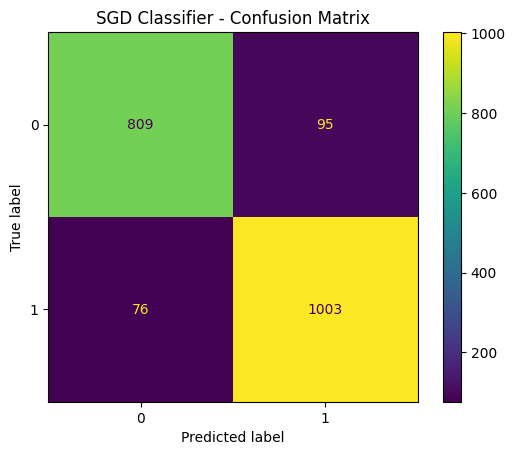

Model: SGD Classifier
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       904
           1       0.91      0.93      0.92      1079

    accuracy                           0.91      1983
   macro avg       0.91      0.91      0.91      1983
weighted avg       0.91      0.91      0.91      1983

ROC-AUC: N/A
--------------------------------------------------


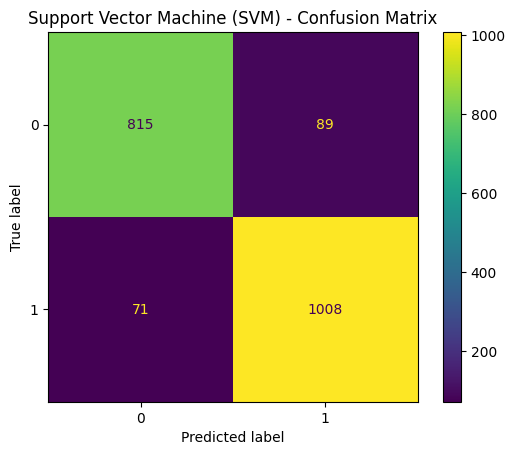

Model: Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       904
           1       0.92      0.93      0.93      1079

    accuracy                           0.92      1983
   macro avg       0.92      0.92      0.92      1983
weighted avg       0.92      0.92      0.92      1983

ROC-AUC: 0.9747830669170898
--------------------------------------------------
Top features using random_forest: ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions', 'Sleep_Hours', 'Physical_Activity', 'Access_to_Resources_Low', 'Parental_Involvement_Low', 'Family_Income_Low', 'Access_to_Resources_Medium', 'Parental_Involvement_Medium', 'Peer_Influence_Positive', 'Distance_from_Home_Near', 'Extracurricular_Activities_Yes', 'Teacher_Quality_Medium']
Results using random_forest selected features:


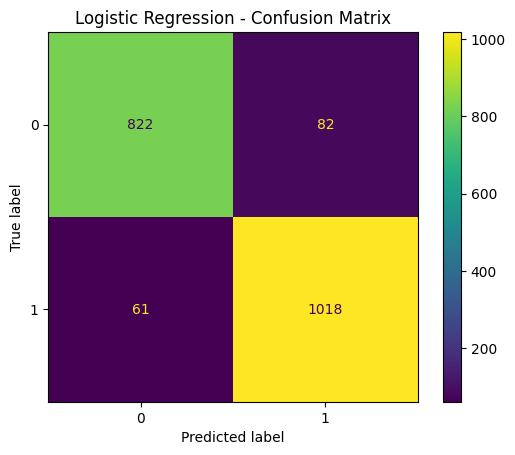

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       904
           1       0.93      0.94      0.93      1079

    accuracy                           0.93      1983
   macro avg       0.93      0.93      0.93      1983
weighted avg       0.93      0.93      0.93      1983

ROC-AUC: 0.9797799092899849
--------------------------------------------------


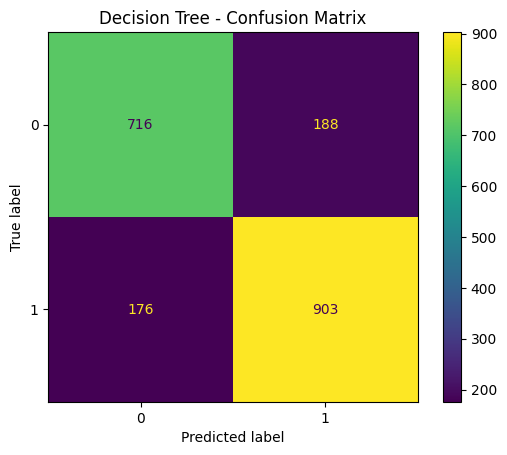

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       904
           1       0.83      0.84      0.83      1079

    accuracy                           0.82      1983
   macro avg       0.82      0.81      0.81      1983
weighted avg       0.82      0.82      0.82      1983

ROC-AUC: 0.8144607018953964
--------------------------------------------------


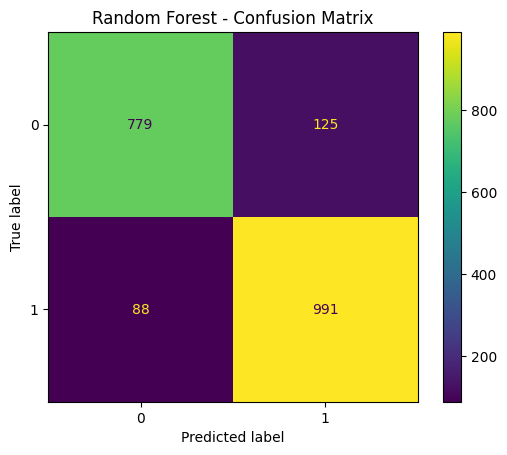

Model: Random Forest
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       904
           1       0.89      0.92      0.90      1079

    accuracy                           0.89      1983
   macro avg       0.89      0.89      0.89      1983
weighted avg       0.89      0.89      0.89      1983

ROC-AUC: 0.962673874531482
--------------------------------------------------


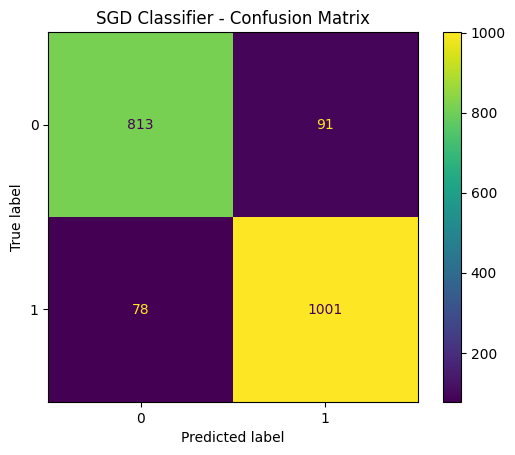

Model: SGD Classifier
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       904
           1       0.92      0.93      0.92      1079

    accuracy                           0.91      1983
   macro avg       0.91      0.91      0.91      1983
weighted avg       0.91      0.91      0.91      1983

ROC-AUC: N/A
--------------------------------------------------


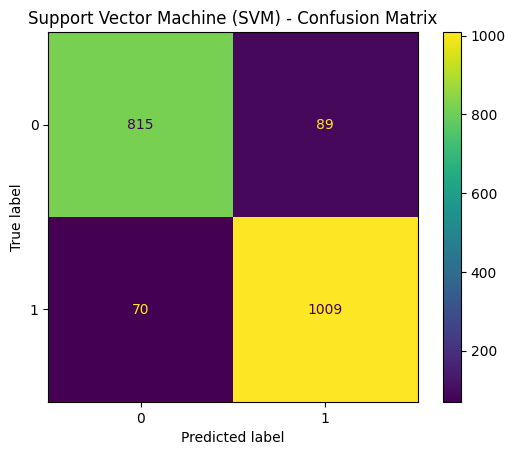

Model: Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       904
           1       0.92      0.94      0.93      1079

    accuracy                           0.92      1983
   macro avg       0.92      0.92      0.92      1983
weighted avg       0.92      0.92      0.92      1983

ROC-AUC: 0.976227578797149
--------------------------------------------------
Top features using rfe: ['Parental_Involvement_Low', 'Parental_Involvement_Medium', 'Access_to_Resources_Low', 'Access_to_Resources_Medium', 'Motivation_Level_Low', 'Internet_Access_Yes', 'Family_Income_Low', 'Teacher_Quality_Low', 'Teacher_Quality_Medium', 'Peer_Influence_Neutral', 'Peer_Influence_Positive', 'Learning_Disabilities_Yes', 'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Moderate', 'Distance_from_Home_Near']
Results using rfe selected features:


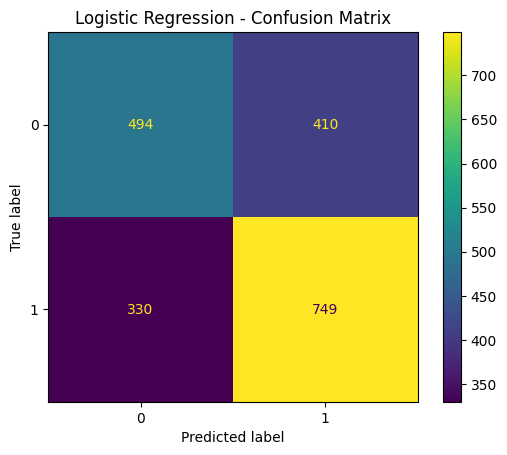

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.60      0.55      0.57       904
           1       0.65      0.69      0.67      1079

    accuracy                           0.63      1983
   macro avg       0.62      0.62      0.62      1983
weighted avg       0.62      0.63      0.62      1983

ROC-AUC: 0.6657226250133277
--------------------------------------------------


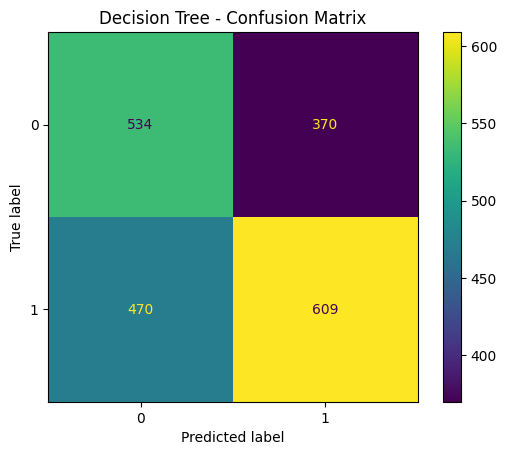

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       904
           1       0.62      0.56      0.59      1079

    accuracy                           0.58      1983
   macro avg       0.58      0.58      0.58      1983
weighted avg       0.58      0.58      0.58      1983

ROC-AUC: 0.5883289796353556
--------------------------------------------------


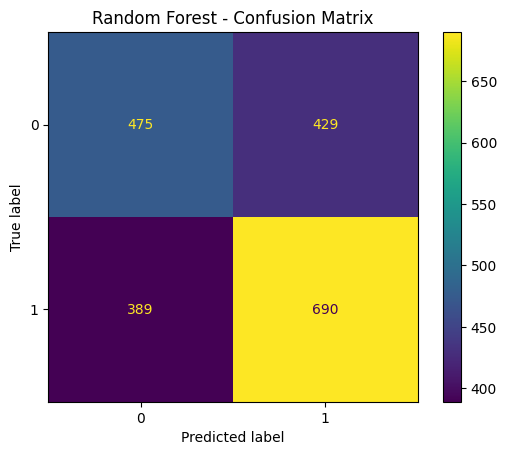

Model: Random Forest
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       904
           1       0.62      0.64      0.63      1079

    accuracy                           0.59      1983
   macro avg       0.58      0.58      0.58      1983
weighted avg       0.59      0.59      0.59      1983

ROC-AUC: 0.6048614129766171
--------------------------------------------------


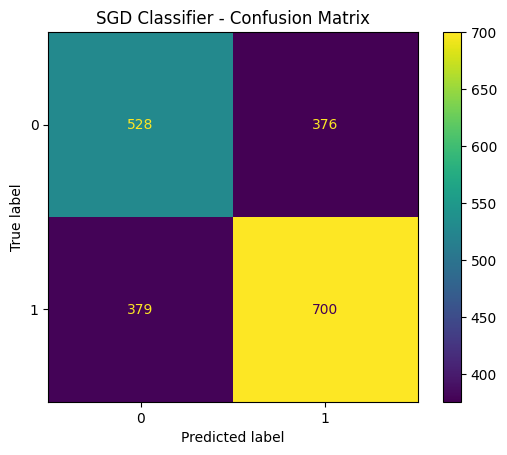

Model: SGD Classifier
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       904
           1       0.65      0.65      0.65      1079

    accuracy                           0.62      1983
   macro avg       0.62      0.62      0.62      1983
weighted avg       0.62      0.62      0.62      1983

ROC-AUC: N/A
--------------------------------------------------


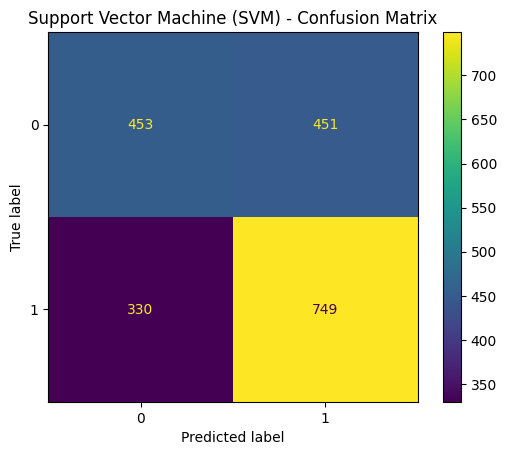

Model: Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       904
           1       0.62      0.69      0.66      1079

    accuracy                           0.61      1983
   macro avg       0.60      0.60      0.60      1983
weighted avg       0.60      0.61      0.60      1983

ROC-AUC: 0.6475811346133342
--------------------------------------------------


In [234]:
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def evaluate_individual_models(X_train, X_test, y_train, y_test, algorithms):
    """
    Evaluate a set of models, print classification reports, and generate confusion matrices.
    """
    results = {}
    
    for name, model in algorithms.items():
        # Cross-validation predictions and model fitting
        y_pred_cv = cross_val_predict(model, X_train, y_train, cv=4, method="predict")
        y_pred_proba_cv = (
            cross_val_predict(model, X_train, y_train, cv=4, method="predict_proba")[:, 1]
            if hasattr(model, "predict_proba")
            else None
        )

        # Fit the model and predict on test data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Evaluate metrics
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

        # Store results
        results[name] = {
            "Confusion Matrix": conf_matrix,
            "Classification Report": class_report,
            "ROC-AUC": roc_auc,
        }
        
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
        disp.plot()
        plt.title(f"{name} - Confusion Matrix")
        plt.show()

        print(f"Model: {name}")
        print(class_report)
        print(f"ROC-AUC: {roc_auc}")
        print("-" * 50)

    return results


def select_top_features(data, target, num_features=15, methods=["pearson", "chi2", "random_forest", "rfe"]):
    """
    Select top features based on specified methods.
    """
    X = data.drop(columns=[target])
    y = data[target]
    selected_features = {}

    # Pearson Correlation
    if "pearson" in methods:
        corr = data.corr()
        top_features_pearson = (
            corr[target]
            .abs()
            .sort_values(ascending=False)
            .iloc[1:num_features + 1]
            .index.tolist()
        )
        selected_features["pearson"] = top_features_pearson

    # Chi-Square Test
    if "chi2" in methods:
        chi_selector = SelectKBest(chi2, k=num_features)
        chi_selector.fit(X, y)
        top_features_chi2 = X.columns[chi_selector.get_support()].tolist()
        selected_features["chi2"] = top_features_chi2

    # Random Forest Feature Importance
    if "random_forest" in methods:
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X, y)
        importance = rf.feature_importances_
        top_features_rf = (
            pd.Series(importance, index=X.columns)
            .sort_values(ascending=False)
            .iloc[:num_features]
            .index.tolist()
        )
        selected_features["random_forest"] = top_features_rf

    # Recursive Feature Elimination (RFE)
    if "rfe" in methods:
        rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=num_features)
        rfe_selector.fit(X, y)
        top_features_rfe = X.columns[rfe_selector.support_].tolist()
        selected_features["rfe"] = top_features_rfe

    return selected_features


def evaluate_models_with_selected_features(data, target, selected_features, method):
    """
    Evaluate models using features selected by a specific method.
    """
    X = data[selected_features]
    y = data[target]

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standard scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Algorithms
    algorithms = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SGD Classifier": SGDClassifier(),
        "Support Vector Machine (SVM)": SVC(probability=True),
    }

    results = evaluate_individual_models(X_train, X_test, y_train, y_test, algorithms)
    
    
    return results


# Example usage
selected_features_dict = select_top_features(final_df, target="Student_Tier")
for method, features in selected_features_dict.items():
    print(f"Top features using {method}: {features}")
    print(f"Results using {method} selected features:")
    results = evaluate_models_with_selected_features(final_df, target="Student_Tier", selected_features=features, method=method)
